In [543]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

#Seaborn settings for visualizations!
rc = {
    "axes.facecolor": "#f7f9fc",
    "figure.facecolor": "#f7f9fc",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

default_palette = 'YlOrRd'

sns.set(rc=rc)
pd.set_option('display.max_columns',35)
pd.options.display.float_format = '{:,.2f}'.format


df_loan = pd.read_csv('loan.csv')

train, test = train_test_split(df_loan, test_size=0.5)

#Let's check the Shape of data
print(f'The Train dataset has {train.shape[0]} rows and {train.shape[1]} columns')
print(f'The Test dataset has {test.shape[0]} rows and {test.shape[1]} columns')

#Let's check the samples of data
display('Train:',train.head())
display('Test:',test.head())

The Train dataset has 142 rows and 8 columns
The Test dataset has 143 rows and 8 columns


'Train:'

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
281,28,Female,Housekeeper,High School,Married,29000,570,Denied
284,32,Male,Security Guard,High School,Married,31000,590,Denied
181,32,Female,Cleaner,High School,Married,24000,560,Denied
31,54,Female,Editor,Master's,Married,85000,760,Approved
102,28,Male,Manager,Bachelor's,Married,105000,780,Approved


'Test:'

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
30,27,Male,Photographer,Associate's,Single,40000,600,Denied
20,38,Male,Pilot,Bachelor's,Married,80000,720,Approved
113,42,Female,Manager,Master's,Married,105000,780,Approved
192,33,Male,Janitor,High School,Married,31000,590,Denied
10,55,Male,Consultant,Master's,Married,110000,770,Approved


In [544]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['Duplicate'] = df.duplicated().sum()
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['avg'] = desc['mean'].values
    summ['std dev'] = desc['std'].values
    summ['top value'] = desc['top'].values
    summ['Freq'] = desc['freq'].values

    return summ
summary(train).style.background_gradient()

,data type,#missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
age,int64,0,0,29,24.000000,54.000000,33.845070,6.067348,nan,nan
gender,object,0,0,2,nan,nan,nan,nan,Male,75
occupation,object,0,0,69,nan,nan,nan,nan,Factory Worker,8
education_level,object,0,0,5,nan,nan,nan,nan,High School,66
marital_status,object,0,0,2,nan,nan,nan,nan,Married,72
income,int64,0,0,47,22000.000000,200000.000000,60577.464789,36029.405631,nan,nan
credit_score,int64,0,0,30,550.000000,850.000000,662.183099,86.877400,nan,nan
loan_status,object,0,0,2,nan,nan,nan,nan,Denied,72


In [545]:
train = train.drop_duplicates()
test = test.drop_duplicates()

In [546]:
def showplot(columnname):
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax = ax.flatten()
    value_counts = train[columnname].value_counts()
    labels = value_counts.index.tolist()
    colors =["#4caba4", "#d68c78",'#a3a2a2','#ab90a0', '#e6daa3', '#6782a8', '#8ea677']
    
    # Donut Chart
    wedges, texts, autotexts = ax[0].pie(
        value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
        wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
    # circle
    centre_circle = plt.Circle((0, 0), 0.6, fc='white')
    ax[0].add_artist(centre_circle)
    
    # Count Plot
    sns.countplot(data=train, y=columnname, ax=ax[1], palette=colors, order=labels)
    for i, v in enumerate(value_counts):
        ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
    sns.despine(left=True, bottom=True)
    plt.yticks(fontsize=9,color='black')
    ax[1].set_ylabel(None)
    plt.xlabel("")
    plt.xticks([])
    fig.suptitle(columnname, fontsize=15, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


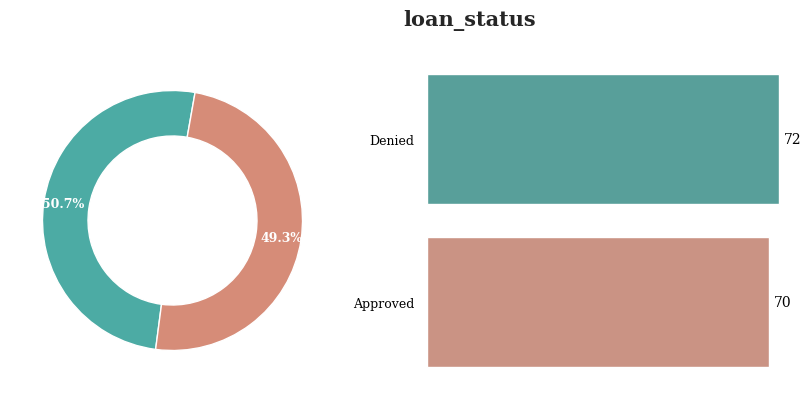

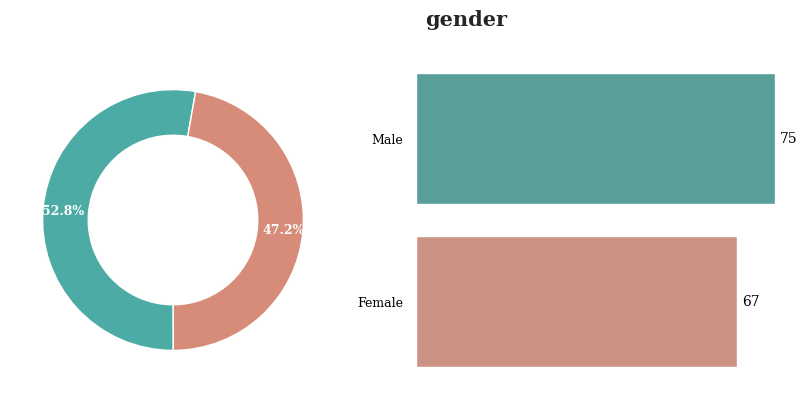

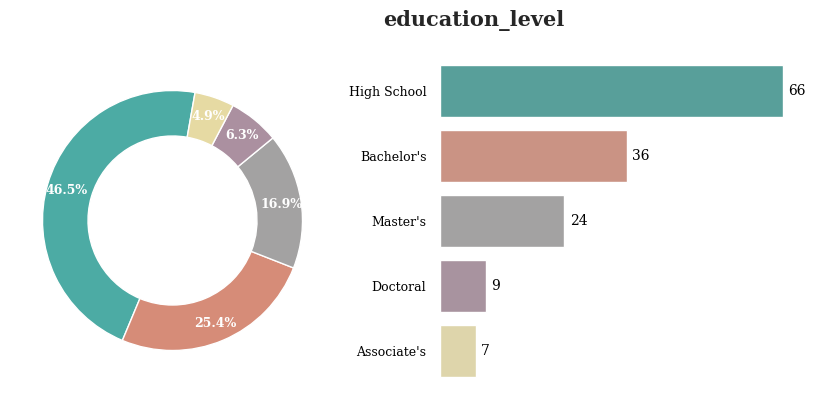

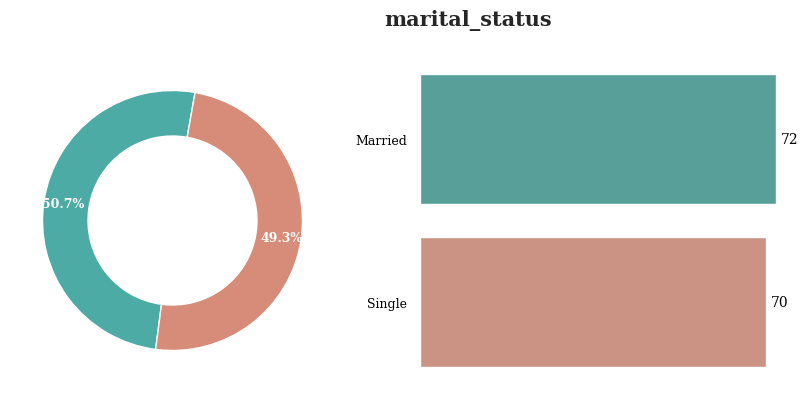

In [547]:
showplot('loan_status')
showplot('gender')
showplot('education_level')
showplot('marital_status')


In [548]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(data):
    # Encode categorical data: 'gender', 'occupation', 'education_level', 'marital_status', 'loan_status'
    encoder = LabelEncoder()
    data['gender'] = encoder.fit_transform(data['gender'])
    data['occupation'] = encoder.fit_transform(data['occupation'])
    data['education_level'] = encoder.fit_transform(data['education_level'])
    data['marital_status'] = encoder.fit_transform(data['marital_status'])
    data['loan_status'] = encoder.fit_transform(data['loan_status'])
    
    # Selecting features for the model
    features = ["age", "gender", "occupation", "education_level", "marital_status", "income", "credit_score"]
    target = "loan_status"
  
    return data[features], data[target]

X_train, y_train = preprocess_data(train)
X_test, y_test = preprocess_data(test)


In [549]:
X_train

,age,gender,occupation,education_level,marital_status,income,credit_score
281,28,0,31,3,0,29000,570
284,32,1,55,3,0,31000,590
181,32,0,9,3,0,24000,560
31,54,0,19,4,0,85000,760
102,28,1,38,1,0,105000,780
...,...,...,...,...,...,...,...
146,29,1,27,2,1,90000,750
51,29,0,16,1,1,48000,640
49,27,0,4,1,1,35000,600
103,46,0,21,4,0,100000,770


In [550]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=600)

# Support Vector Machine
svm = SVC()

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)

In [551]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Prepare a Stratified K-Fold to maintain ratio of classes in each fold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Initialize models list
models = [
    (decision_tree, 'Decision Tree'),
    (random_forest, 'Random Forest'),
    (logreg, 'Logistic Regression'),
    (svm, 'SVM'),
    (knn, 'KNN')
]

metrics = [accuracy_score, precision_score, recall_score, f1_score]

def evaluate_models_by_metric(models, X, y, metrics):
    results = []
    detailed_results = {metric.__name__: [] for metric in metrics}
    
    for model, name in models:
        model_results = {'Model': name}
        for metric in metrics:
            score = cross_val_score(model, X, y, cv=skf, scoring=make_scorer(metric))
            model_results[metric.__name__] = score.mean()
            results.append({'Model': name, 'Metric': metric.__name__, 'Score': score.mean()})
        
        for metric_name in detailed_results:
            detailed_results[metric_name].append(model_results)

    for metric_name, data in detailed_results.items():
        print(f"\n--- {metric_name.upper()} ---")
        for result in data:
            print(f"{result['Model']} Average {metric_name}: {result[metric_name]:.5f}")

    return pd.DataFrame(results)

# Usage
results_df = evaluate_models_by_metric(models, X_train, y_train, metrics)


--- ACCURACY_SCORE ---
Decision Tree Average accuracy_score: 0.97906
Random Forest Average accuracy_score: 0.98596
Logistic Regression Average accuracy_score: 0.97192
SVM Average accuracy_score: 0.98596
KNN Average accuracy_score: 0.98596

--- PRECISION_SCORE ---
Decision Tree Average precision_score: 0.97647
Random Forest Average precision_score: 0.98750
Logistic Regression Average precision_score: 0.98667
SVM Average precision_score: 0.98750
KNN Average precision_score: 0.98750

--- RECALL_SCORE ---
Decision Tree Average recall_score: 0.97143
Random Forest Average recall_score: 0.98571
Logistic Regression Average recall_score: 0.95810
SVM Average recall_score: 0.98571
KNN Average recall_score: 0.98571

--- F1_SCORE ---
Decision Tree Average f1_score: 0.97873
Random Forest Average f1_score: 0.98614
Logistic Regression Average f1_score: 0.97128
SVM Average f1_score: 0.98614
KNN Average f1_score: 0.98614


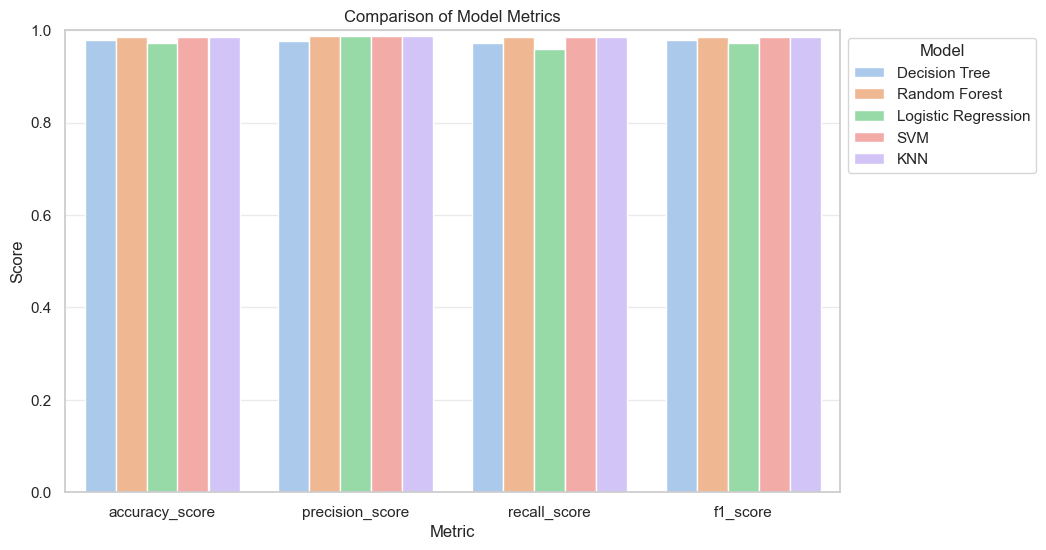

In [552]:
import seaborn as sns

def plot_results(results_df):
    sns.set_theme(style="whitegrid", palette="pastel")
    plt.figure(figsize=(10, 6))
    plot = sns.barplot(x="Metric", y="Score", hue="Model", data=results_df)
    plot.set_title('Comparison of Model Metrics')
    plot.set_ylim(0, 1)
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

plot_results(results_df)